In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Lab# 6

### Setup

In [2]:
mu = 100
size = 100000
dist = stats.poisson.rvs(mu, size=size)

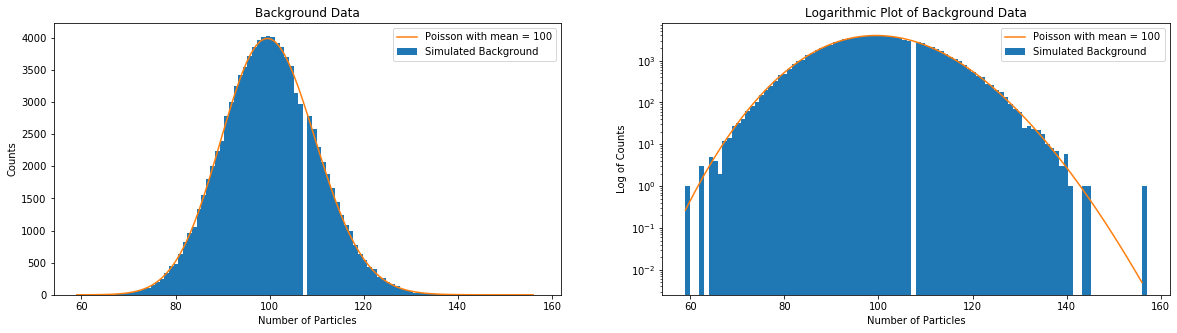

In [3]:
x = np.arange(dist.min(), dist.max())

fig, ax = plt.subplots(1,2, figsize=(20,5))
ax[0].hist(dist, bins=100, label='Simulated Background')
ax[0].plot(x, size*stats.poisson.pmf(x,mu), label='Poisson with mean = 100')
ax[0].set_title('Background Data')
ax[0].set_xlabel('Number of Particles')
ax[0].set_ylabel('Counts')
ax[0].legend()

ax[1].hist(dist, bins = 100, label='Simulated Background')
ax[1].plot(x, size*stats.poisson.pmf(x,mu), label='Poisson with mean = 100')
ax[1].set_yscale('log')
ax[1].set_title('Logarithmic Plot of Background Data')
ax[1].set_xlabel('Number of Particles')
ax[1].set_ylabel('Log of Counts')
ax[1].legend()

Before we start, we create the simulated LHC background data which has a Poisson Distribution with a mean of 100. We can confirm that our simulated background is indeed a Poisson Distribution by looking at its log plot.

### Problem 1

In [4]:
prob = stats.norm.cdf(5)

f_sigma_u_t = stats.poisson.ppf(prob, 100)
f_sigma_l_t = stats.poisson.ppf(1-prob, 100)

print('The 5 sigma upper threshold is ' + str(f_sigma_u_t) + ' and the lower one is ' + str(f_sigma_l_t))

The 5 sigma upper threshold is 154.0 and the lower one is 54.0


We find that the 5 sigma threshold for this simulated background lies between 54 and 154 particles. One thing to note is that it is not symmetric about the mean.

### Problem 2

In [5]:
prob_2 = stats.norm.cdf(8)

threshold = stats.poisson.ppf(prob_2, 100)
temp = dist
new_bkgd = temp + np.ones(size)*threshold

We find the threshold value associated to an 8 sigma reading and then we add that to our background signal 100,000 times.

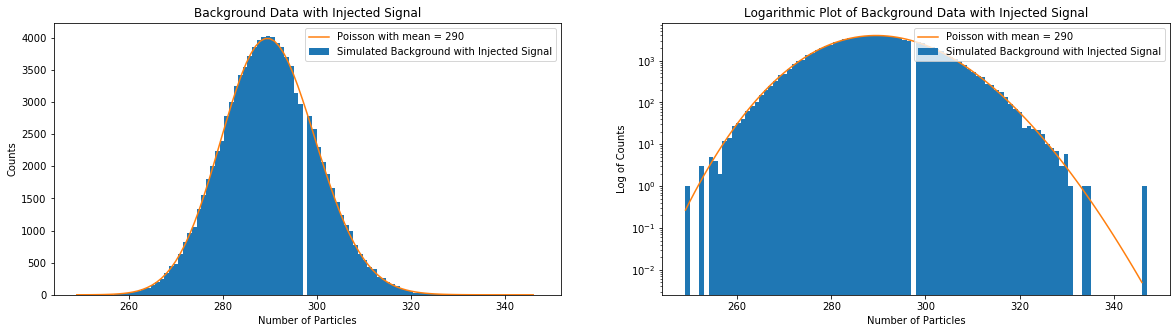

In [6]:
fig2, ax2 = plt.subplots(1,2, figsize=(20,5))
ax2[0].hist(new_bkgd, bins=100, label='Simulated Background with Injected Signal')
ax2[0].plot(x + threshold, size*stats.poisson.pmf(x,mu), label='Poisson with mean = 290')
ax2[0].set_title('Background Data with Injected Signal')
ax2[0].set_xlabel('Number of Particles')
ax2[0].set_ylabel('Counts')
ax2[0].legend()

ax2[1].hist(new_bkgd, bins = 100, label='Simulated Background with Injected Signal')
ax2[1].plot(x + threshold, size*stats.poisson.pmf(x,mu), label='Poisson with mean = 290')
ax2[1].set_yscale('log')
ax2[1].set_title('Logarithmic Plot of Background Data with Injected Signal')
ax2[1].set_xlabel('Number of Particles')
ax2[1].set_ylabel('Log of Counts')
ax2[1].legend()

By looking at the histogram of the background data injected with our new signal, we can see that the mean has shifted by 190 units which is the strength of our signal. The signal seems to be quite symmetric around the mean; however, there is still a slight difference as we can see by the log plot. The background distribution is no longer a perfect Poisson Distribution since as the mean increases, the distribution becomes more like a gaussian distribtuion. This histogram tells us that even if we add the injected signal to the noise in the background several times, then the combined distribution will tend to look like the inital distribution with some shifting.

Our observed signal is definitely biased since we are more likely to see values that are much greater than the injected signal (190) due to the initial background's mean of 100.

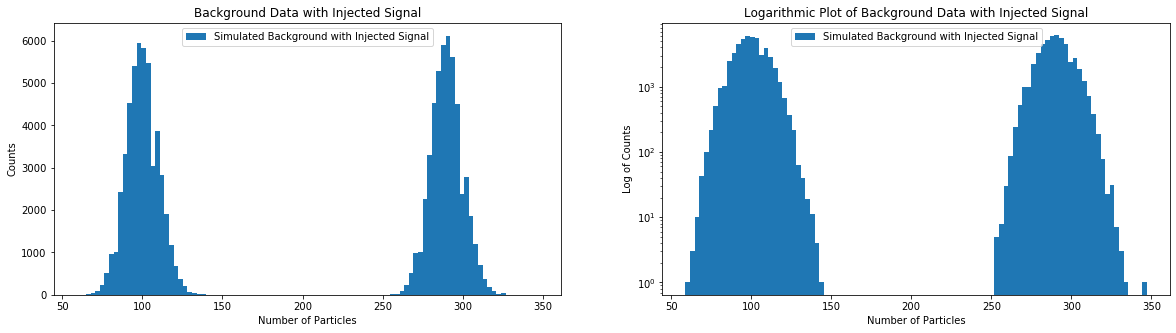

In [7]:
temp2 = dist
new_bkgd_2 = [temp2[x] + threshold if x % 2 == 0 else temp2[x] for x in range(size)]

fig3, ax3 = plt.subplots(1,2, figsize=(20,5))
ax3[0].hist(new_bkgd_2, bins=100, label='Simulated Background with Injected Signal')
ax3[0].set_title('Background Data with Injected Signal')
ax3[0].set_xlabel('Number of Particles')
ax3[0].set_ylabel('Counts')
ax3[0].legend()

ax3[1].hist(new_bkgd_2, bins = 100, label='Simulated Background with Injected Signal')
ax3[1].set_yscale('log')
ax3[1].set_title('Logarithmic Plot of Background Data with Injected Signal')
ax3[1].set_xlabel('Number of Particles')
ax3[1].set_ylabel('Log of Counts')
ax3[1].legend()

Similarly, if we repeat the above but this time only injecting the signal 50,000 times, we can see that there are now two peaks. One is consistent with the initial background and the second one is centered around 290 which is the initial mean plus our injected signal. The signals are not symmetric as we can see from the log plots, and they are still biased as we can see from the second peak centered around 290.

### Problem 3

In [8]:
prob_30_sigma = stats.norm.sf(30)
print('Probability assocaited to 30 sigma reading is ' + str(prob_30_sigma) + "\n")


for i in [300, 400, 500, 600]:
    print(str(stats.poisson.sf(i, 100)))

print("\n" + str(stats.poisson.sf(527, 100)))

Probability assocaited to 30 sigma reading is 4.906713927147908e-198

6.03239161500574e-59
1.9279451549871996e-113
7.598535673151782e-179
5.864818925793314e-253

4.547845082529376e-198


In order to plot our 2D histogram, we must first find the signal strength value that corresponds with 30 sigma. We find that a signal of strength 527 is quite close to the 30 sigma value so we use that for our array of injected signals.

In [9]:
injected_list = np.arange(0, 528)
bkgd_with_injected = [dist + each for each in injected_list]
injected_2d = []
for sig in injected_list:
    temp = [sig for i in range(0, len(bkgd_with_injected[0]))]
    injected_2d = np.concatenate((injected_2d, temp))

Text(0, 0.5, 'Injected Signals')

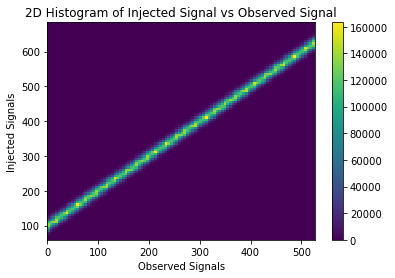

In [10]:
plt.hist2d(injected_2d, bkgd_with_injected.flatten(), bins = 100)
plt.colorbar()
plt.title('2D Histogram of Injected Signal vs Observed Signal')
plt.xlabel('Observed Signals')
plt.ylabel('Injected Signals')

Here we are simulating a set of injected signals of varying strengths (0 sigma to 30 sigma) that are added to a background Poisson distribution that is centered at 100. By looking at the 2D histogram, we can see that there is a line that runs through the center. This is a sign of the initial background having a mean of 100 which shifts each time that we add a signal of different strength. 

Text(0.5, 1.0, 'Comparison of slice and old background')

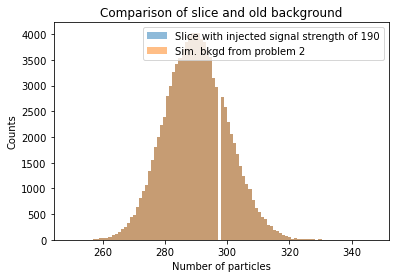

In [17]:
plt.hist(bkgd_with_injected[190], bins = 100, alpha = 0.5, label = 'Slice with injected signal strength of 190')
plt.hist(new_bkgd, bins = 100, alpha = 0.5, label = 'Sim. bkgd from problem 2')
plt.xlabel('Number of particles')
plt.ylabel('Counts')
plt.legend()
plt.title('Comparison of slice and old background')

By taking a slice of the 2D histogram at the corresponding signal strength from problem 2 and overlaying it with the histogram from problem 2, we can see that they are both the same.

The mean of the new distribution is 250.01902


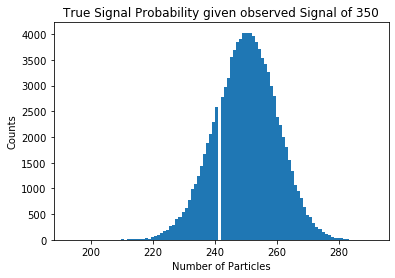

In [21]:
new_bkgd_2 = injected_list[np.where(bkgd_with_injected == 350)[0]]
plt.hist(new_bkgd_2, bins=100)
plt.xlabel('Number of Particles')
plt.ylabel('Counts')
plt.title('True Signal Probability given observed Signal of 350')
print('The mean of the new distribution is ' + str(np.mean(new_bkgd_2)))

Choosing an observed signal of 350 we then plot a histogram of signals that could have given us this signal. This shows us that there is a large range of values that the injected signal could be; furthermore, this histogram shows us that the most likely injected signal is in fact 250 not 350 which makes sense since our initial distribution has a mean of 100.

In [24]:
o_sigma_u_t = np.quantile(new_bkgd_2, stats.norm.cdf(1))
o_sigma_l_t = np.quantile(new_bkgd_2, 1 - stats.norm.cdf(1))
print('The 1 sigma upper threshold is ' + str(o_sigma_u_t) + ' and the lower one is ' + str(o_sigma_l_t))

The 1 sigma upper threshold is 260.0 and the lower one is 240.0


In [25]:
f_sigma_u_t = np.quantile(new_bkgd_2, stats.norm.cdf(5))
f_sigma_l_t = np.quantile(new_bkgd_2, 1 - stats.norm.cdf(5))
print('The 5 sigma upper threshold is ' + str(f_sigma_u_t) + ' and the lower one is ' + str(f_sigma_l_t))

The 5 sigma upper threshold is 290.91400538838934 and the lower one is 193.3439784464894


This distribution is definitely biased since we are more likely to find signals of strength less than the injected signal. However, this time the distribution seems symmetric as we can see from both the upper and lower 1 sigma thresholds being an equal distance away from the mean, but by looking at the 5 sigma thresholds we can see that it is in fact not symmetrical. This makes sense since in general using the one sigma threshold will give us values much closer to the distribution which is where the distribution might still be relatively stable; however, once we look at the edges it makes sense that it would deviate from this.